# Spatial Pattern Finding

## Global Morans'I

### 1.Entry Rate

Global Morans'I = 0.146

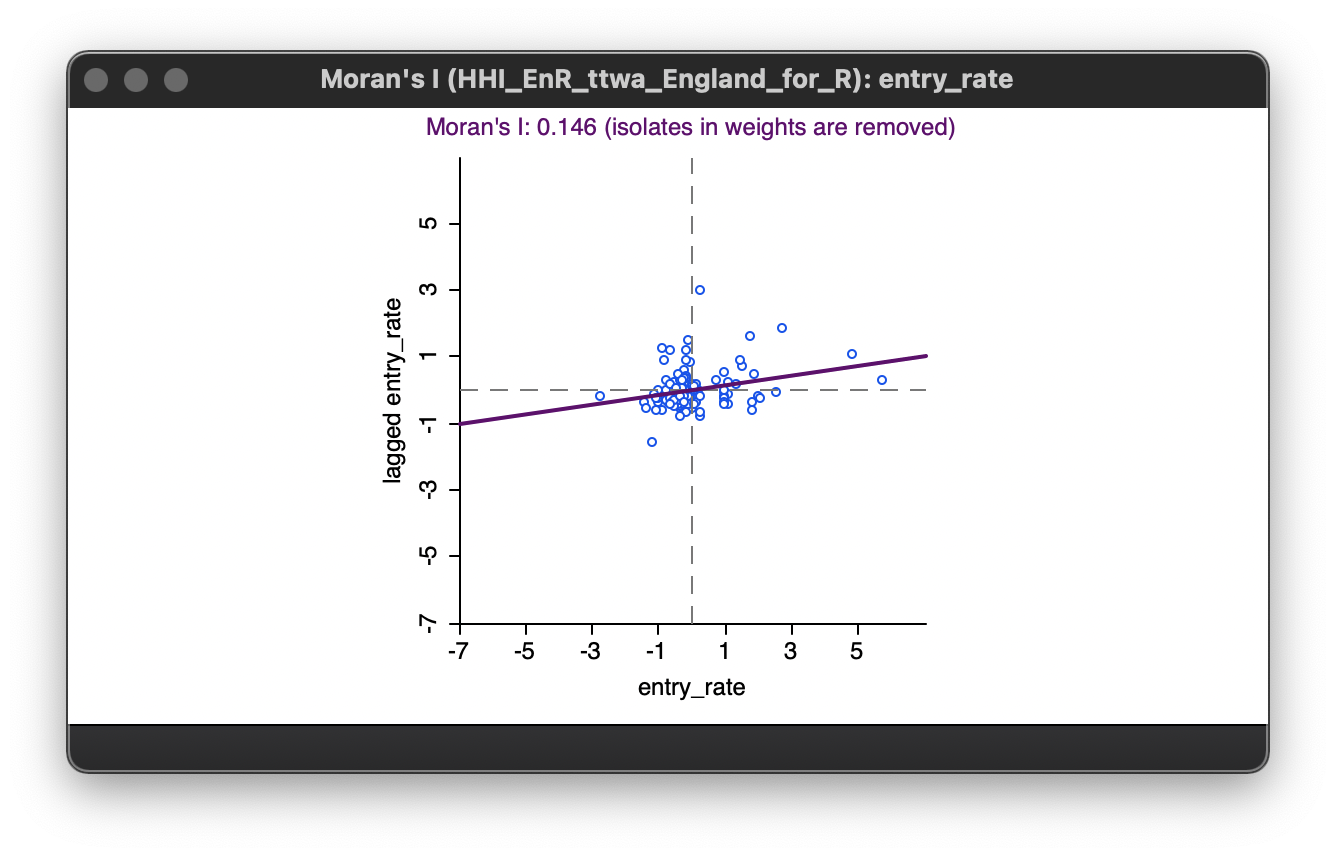

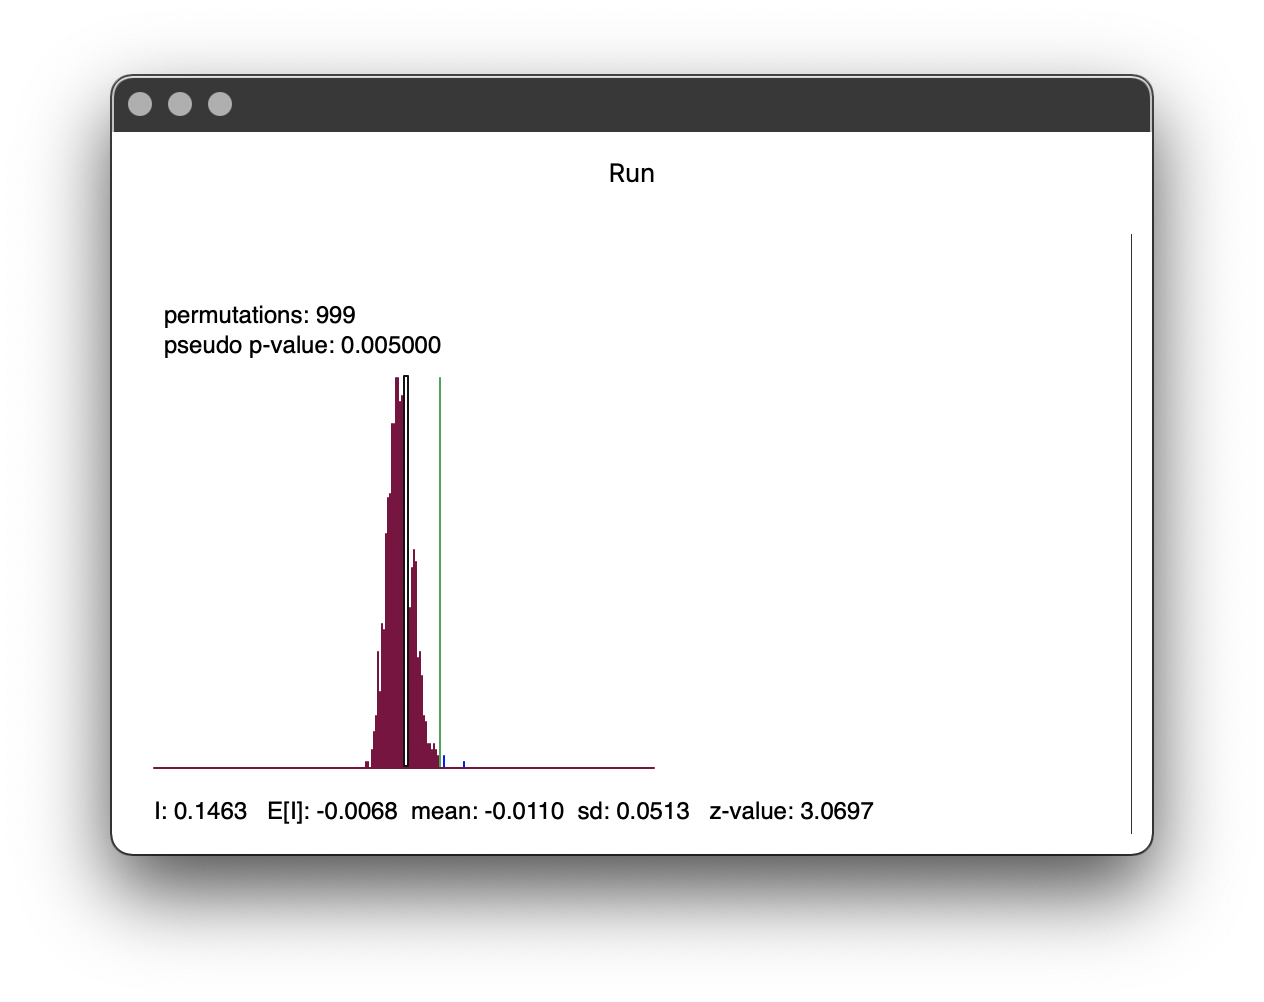

### 2.HHI

Global Morans'I = 0.296

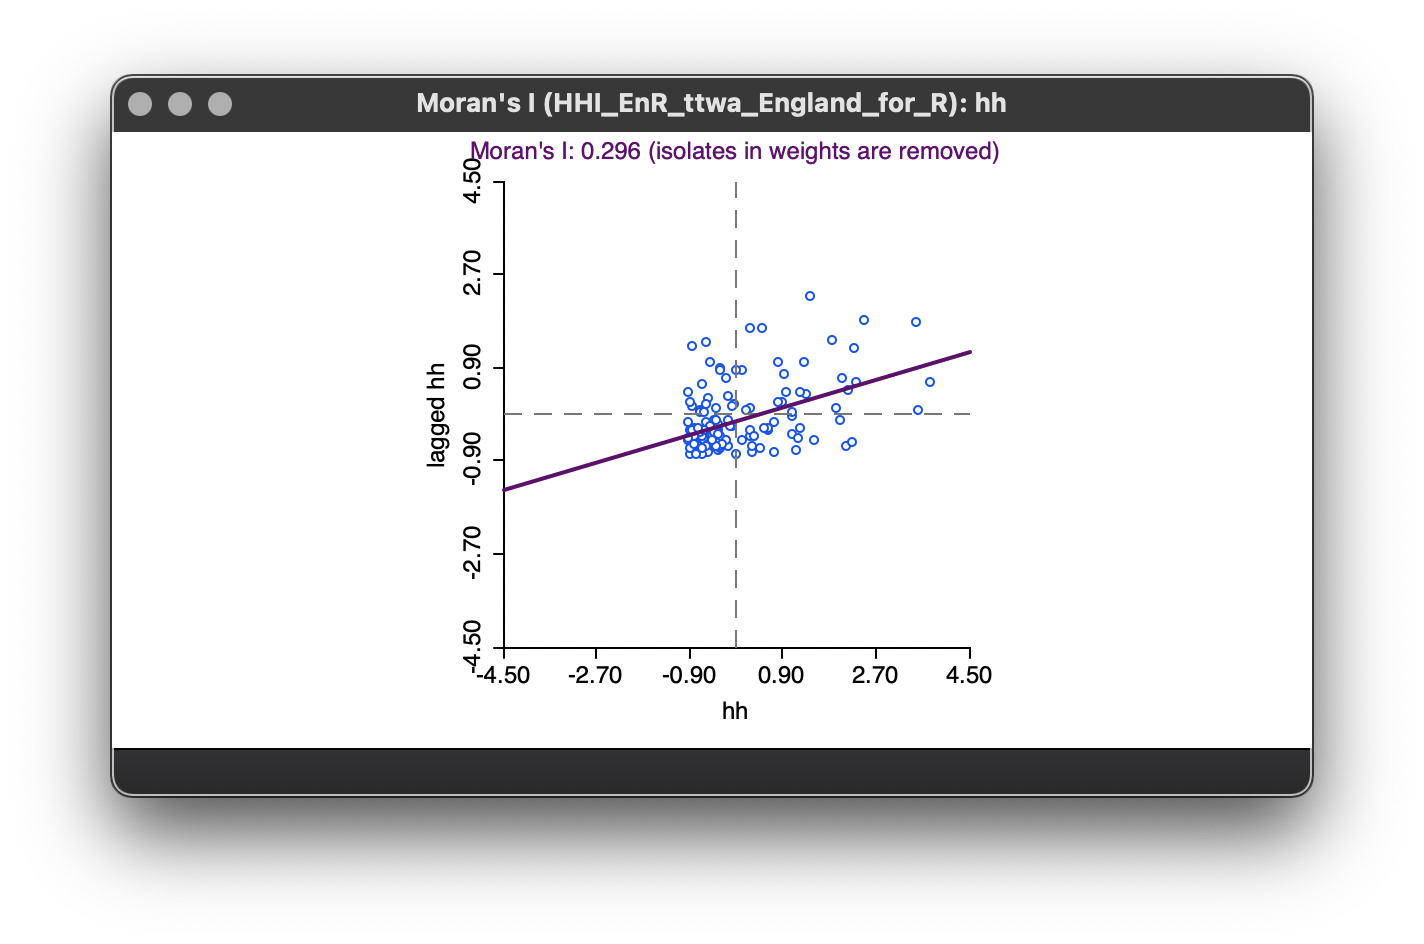

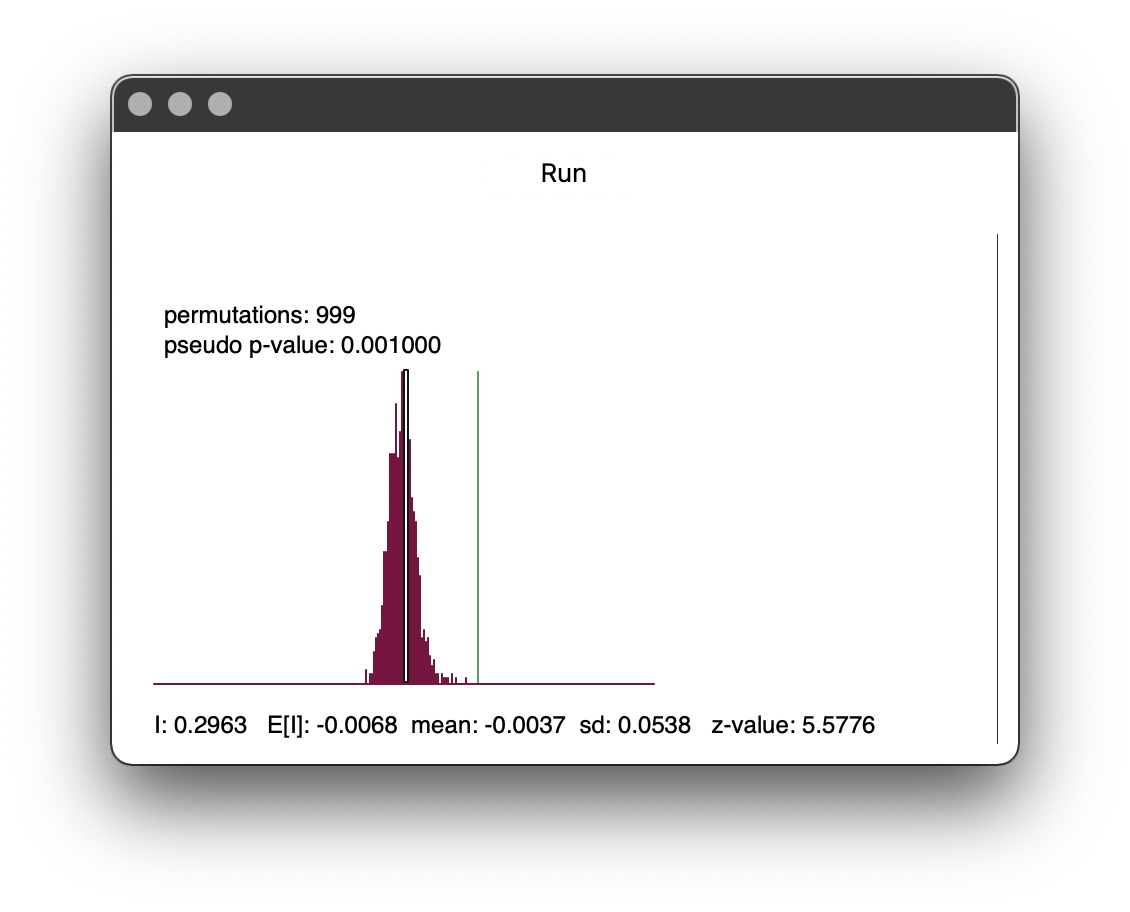

### 3.Asset

Global Morans'I = 0.025

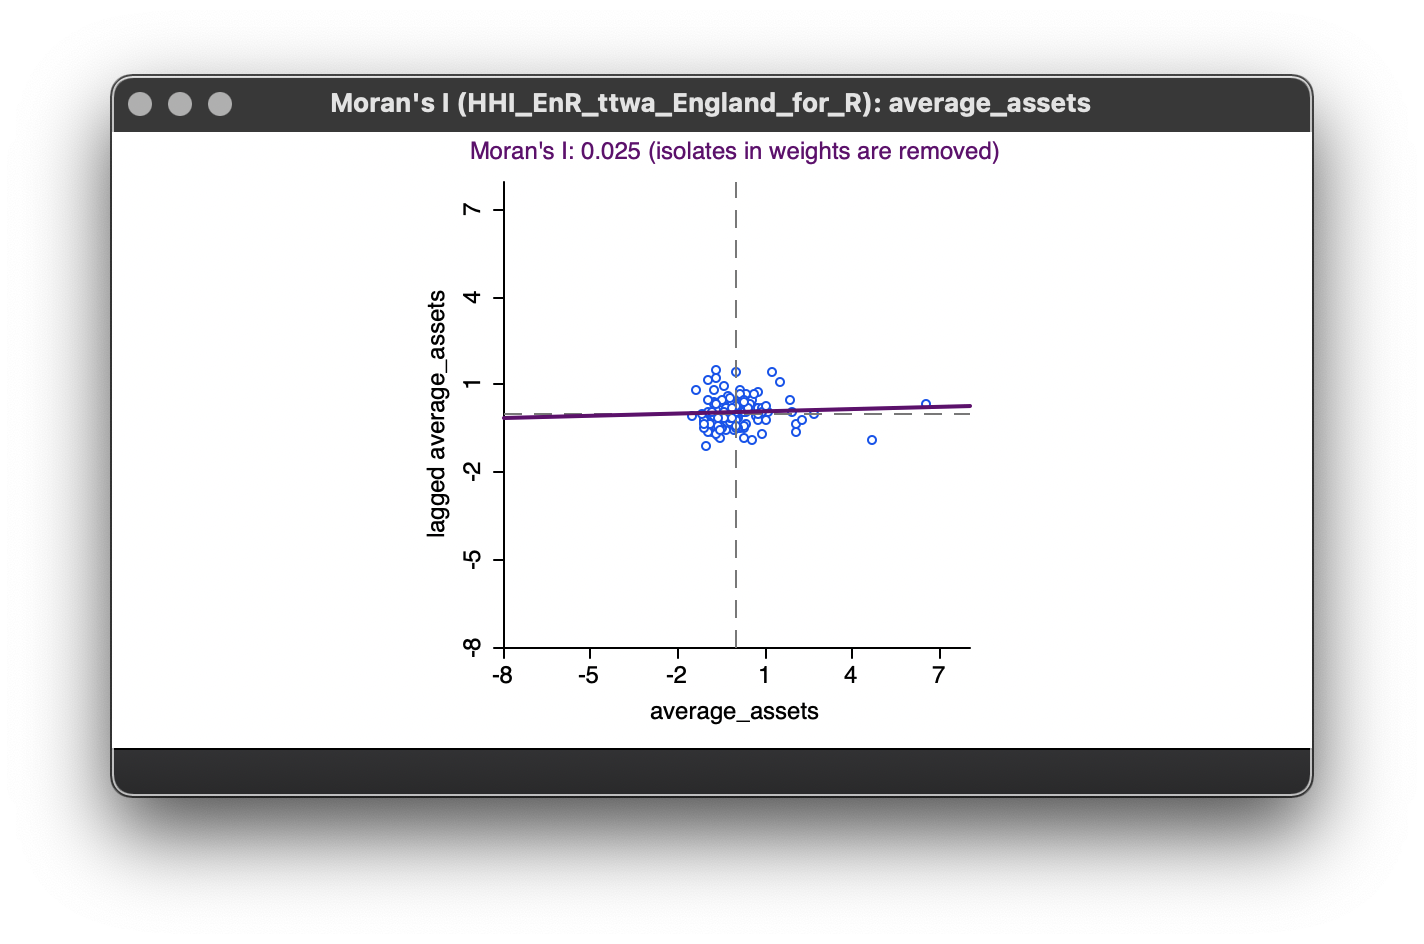

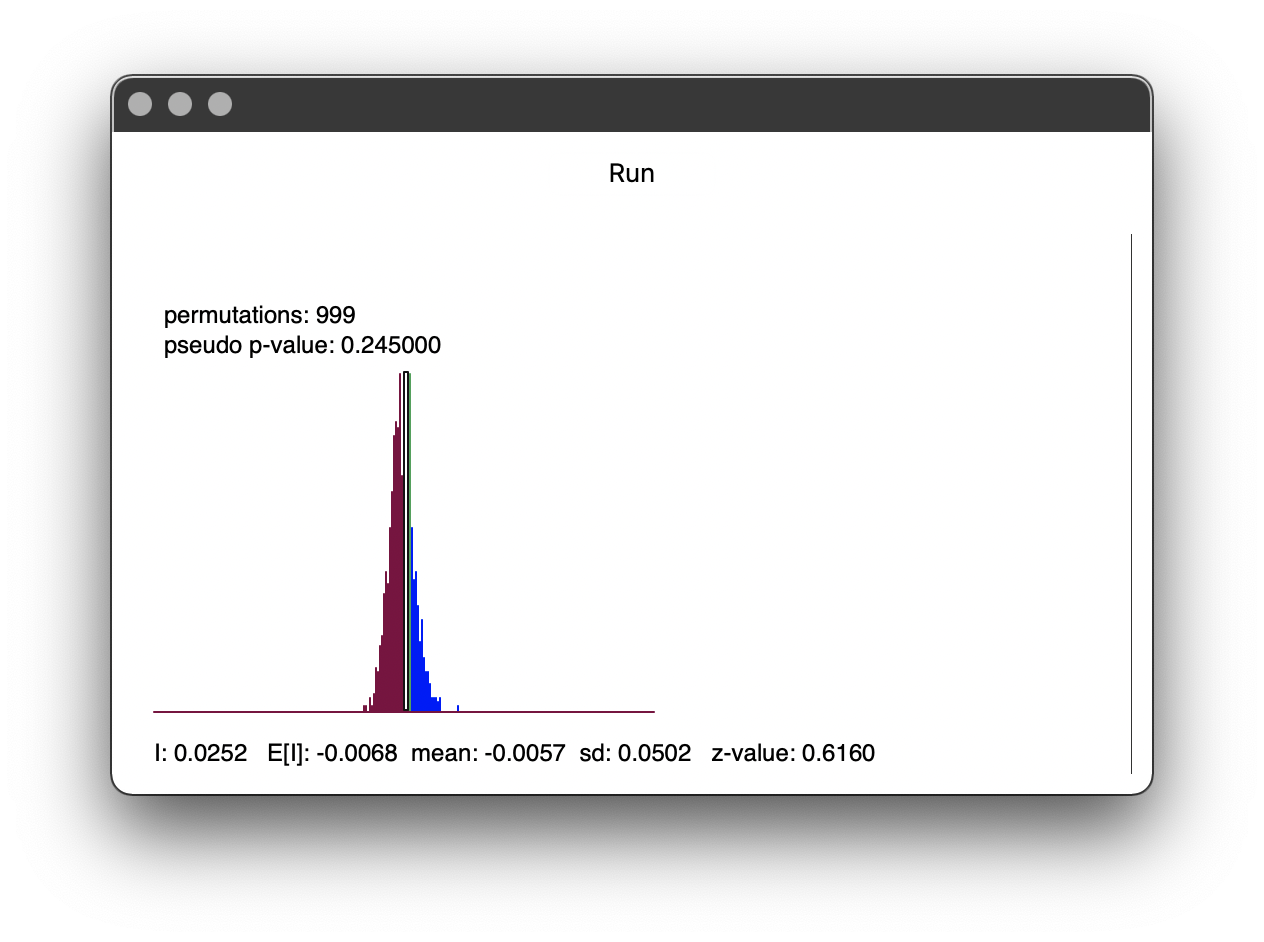

## LISA

### 1. Entry Rate

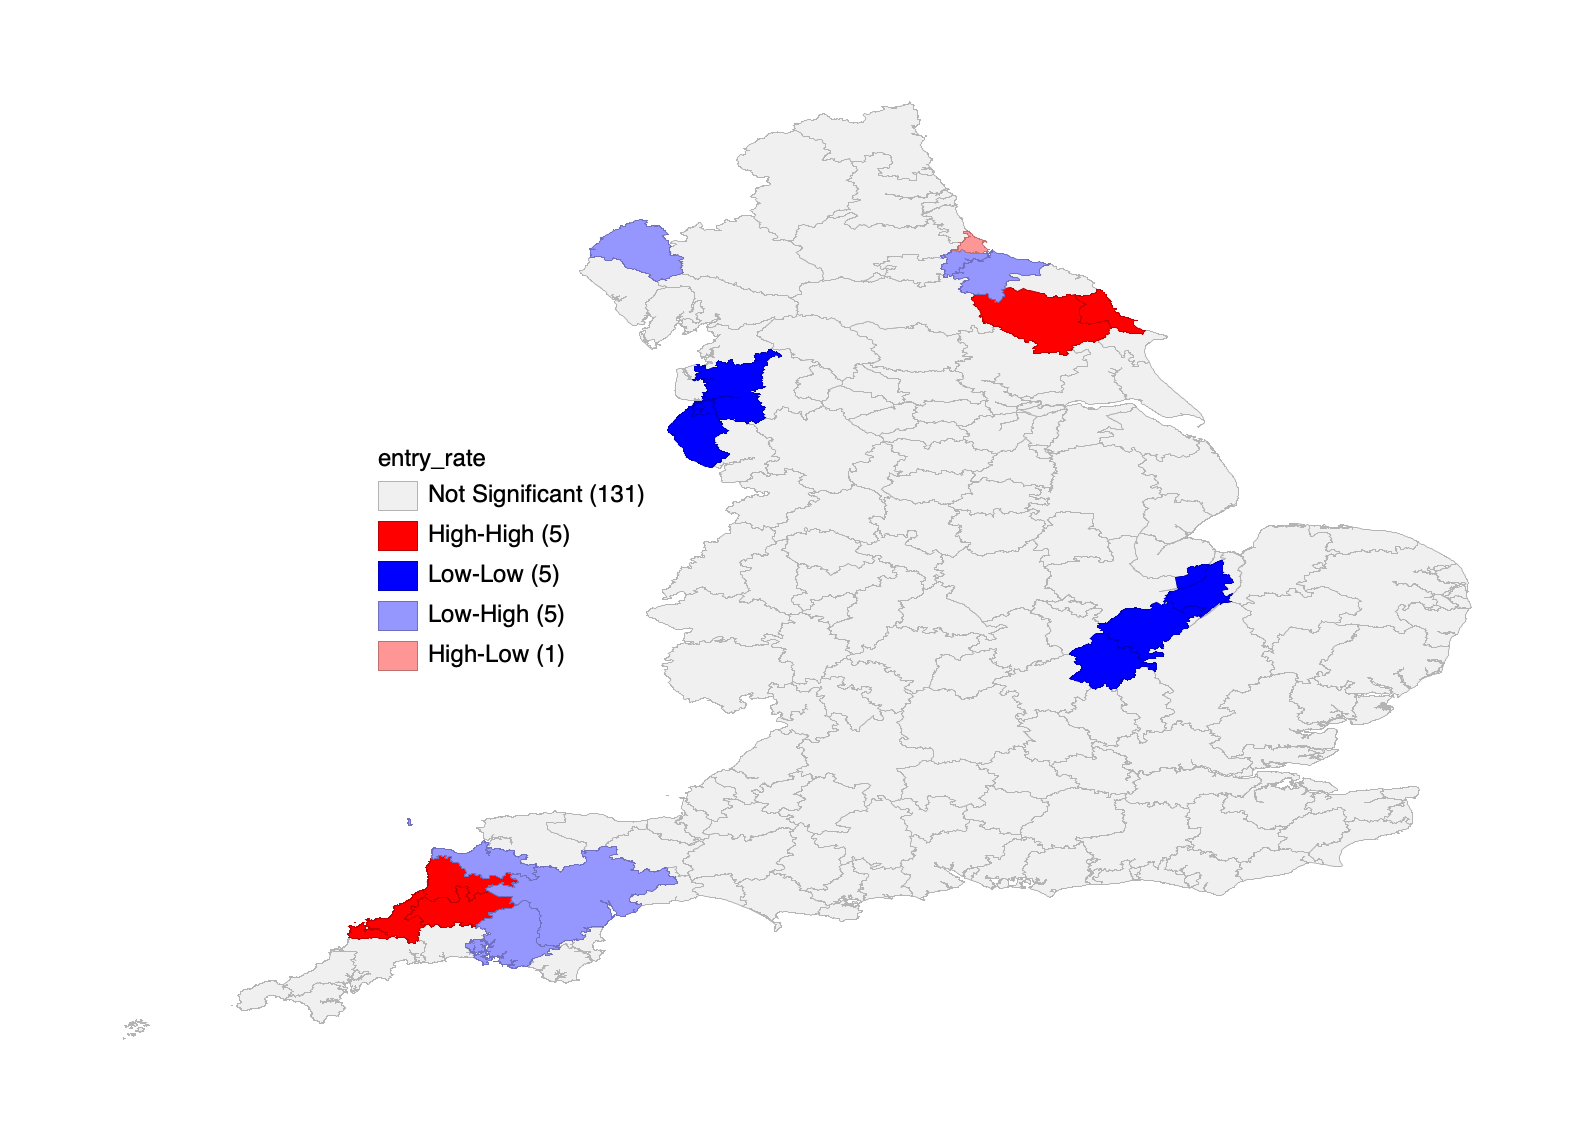

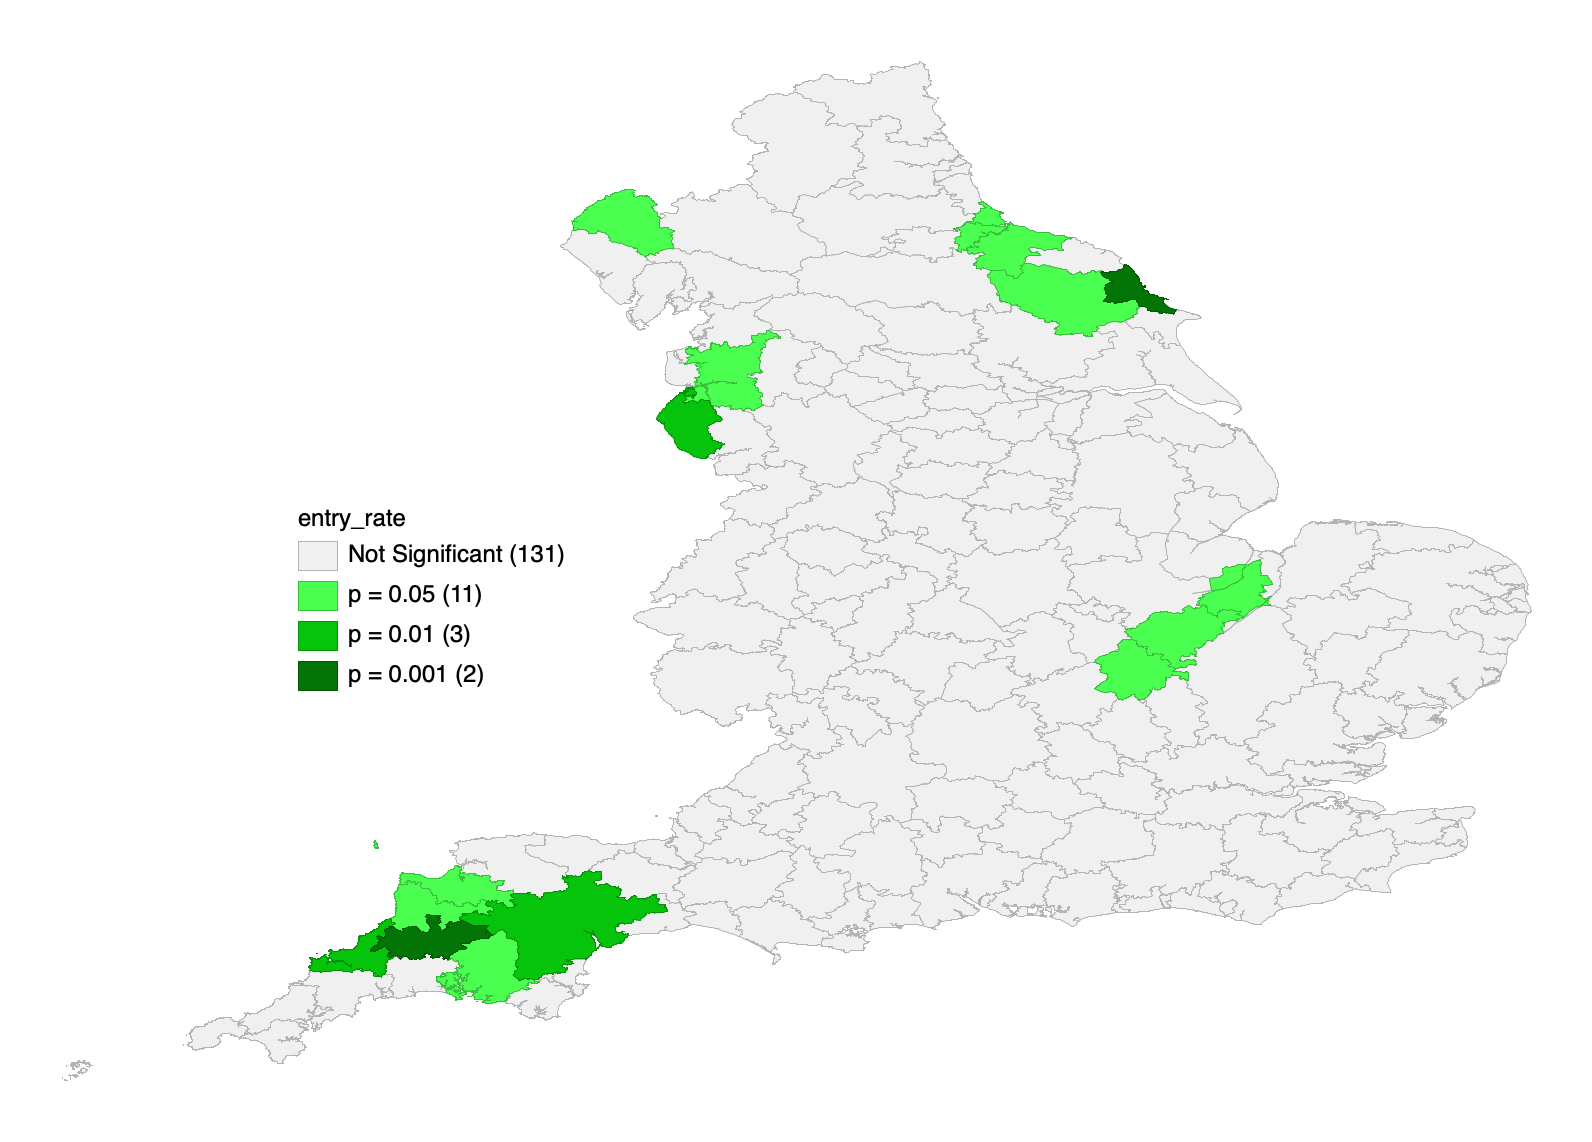

### 2. HHI

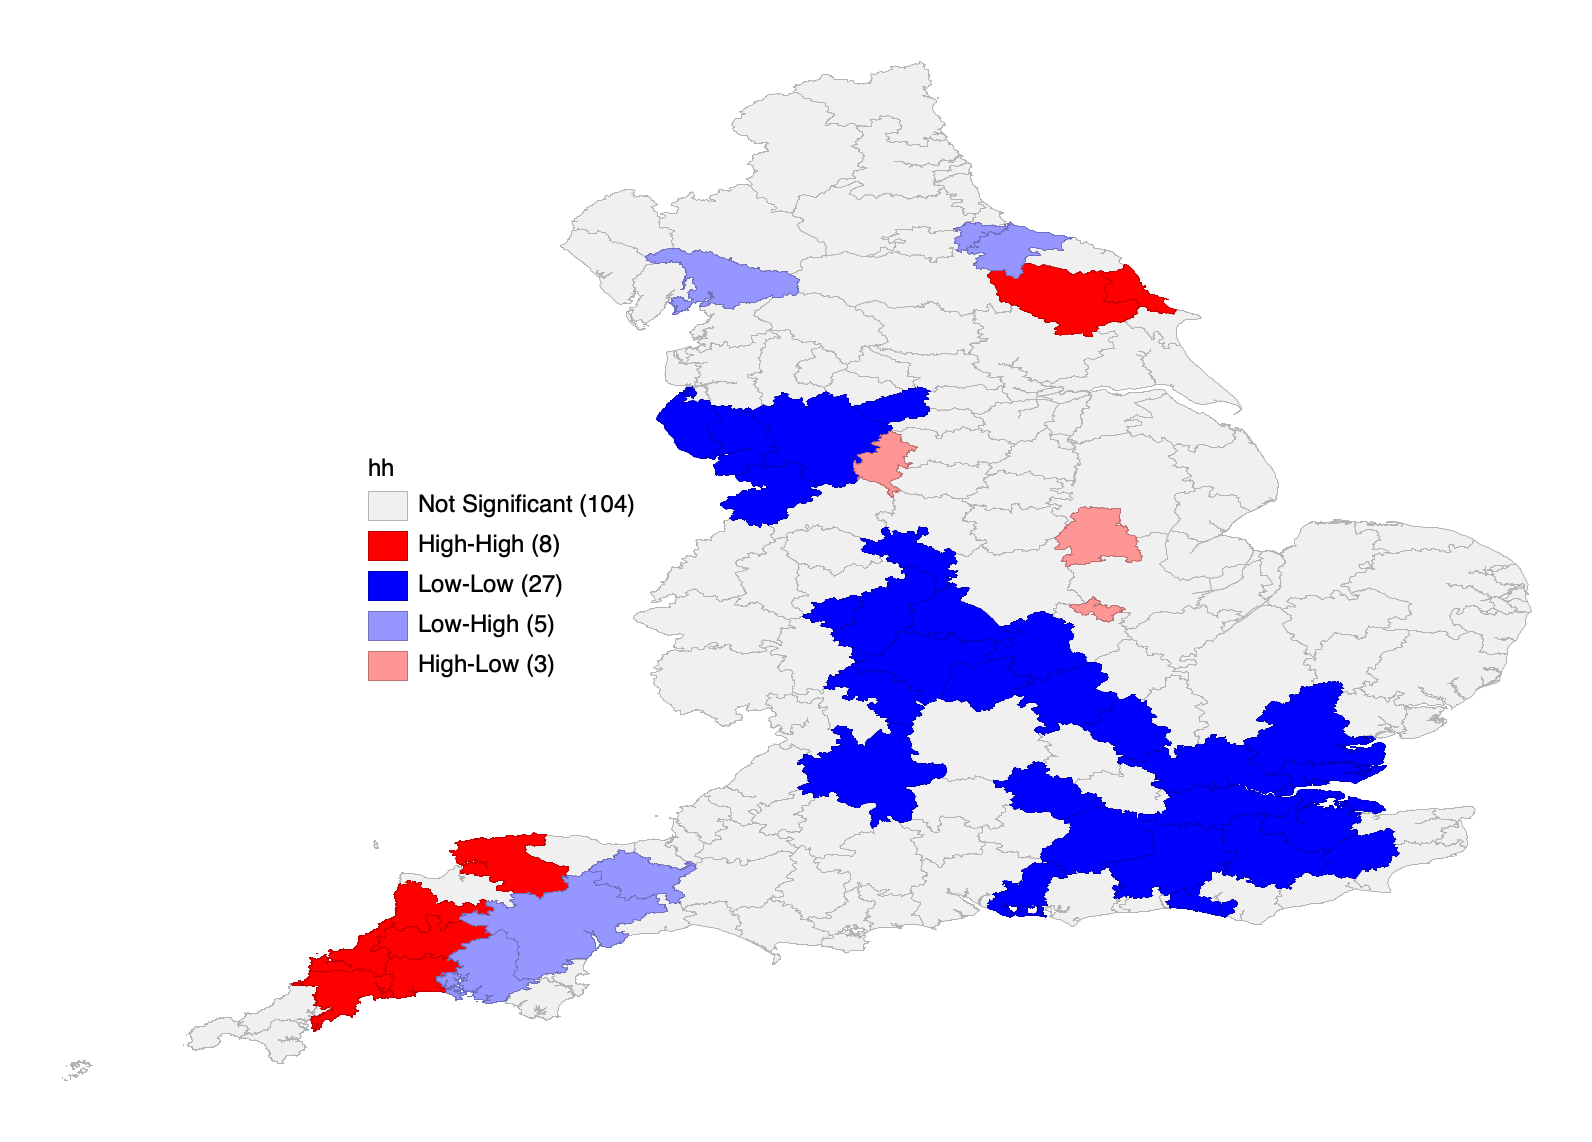

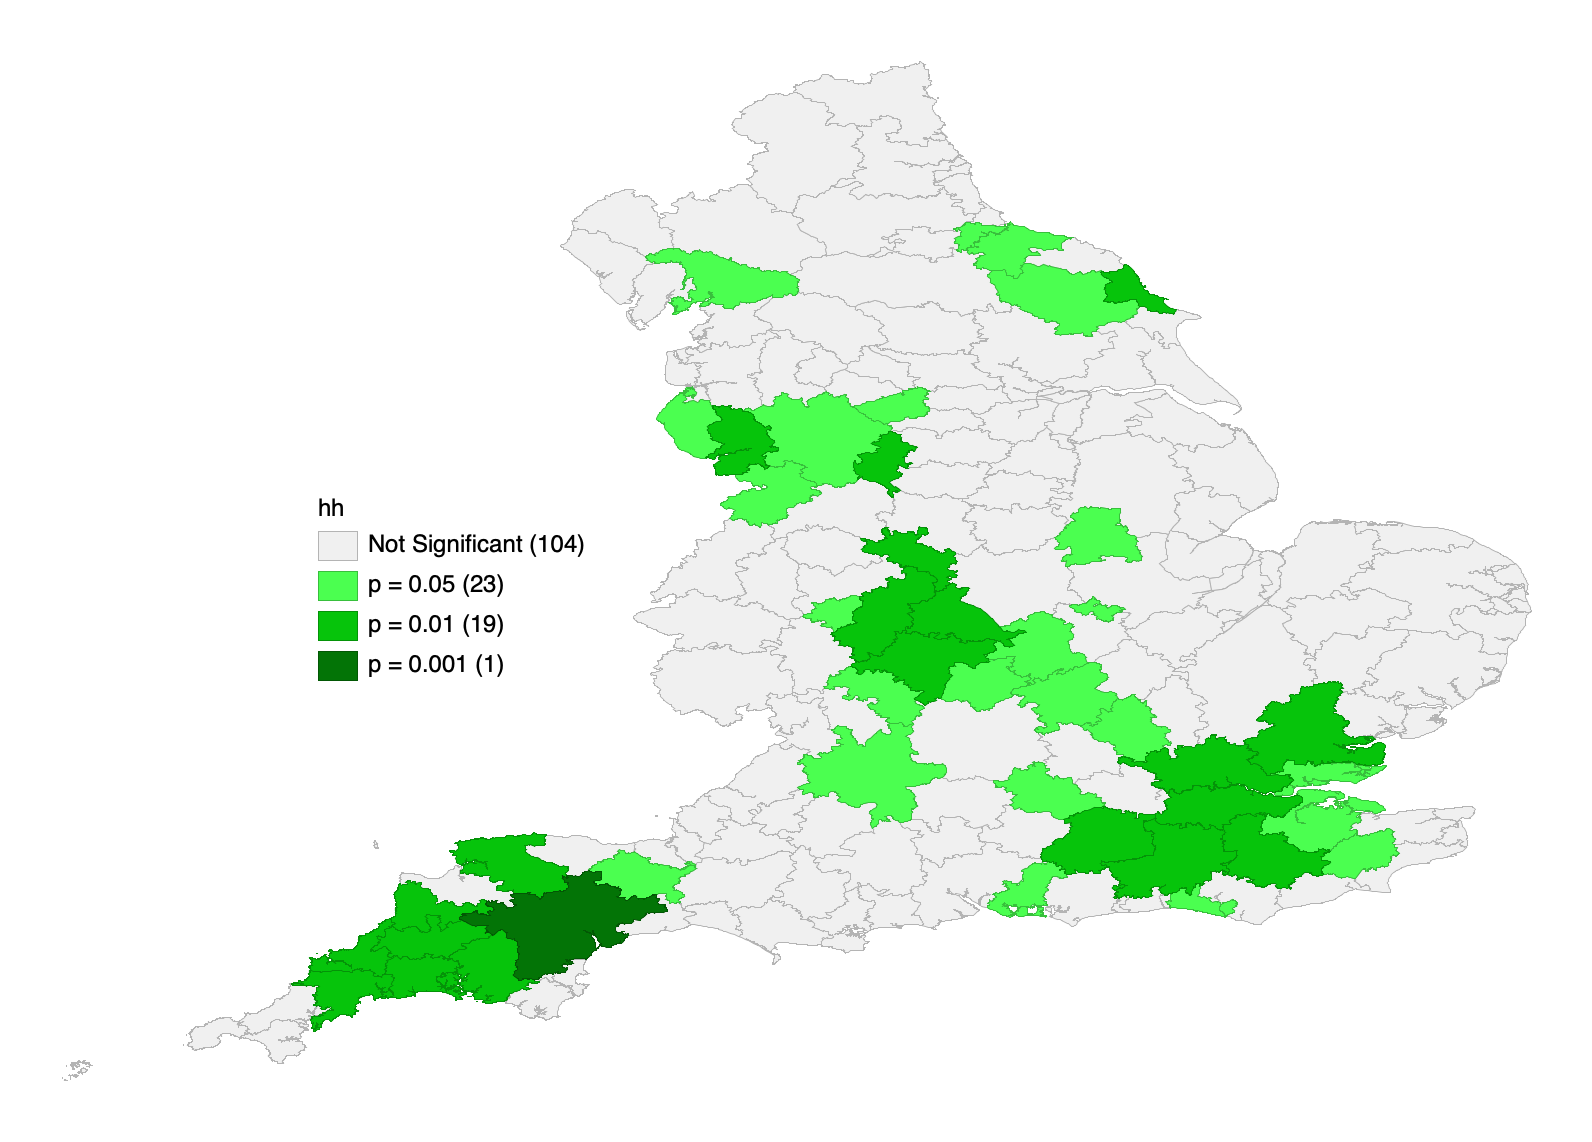

### 3. Asset

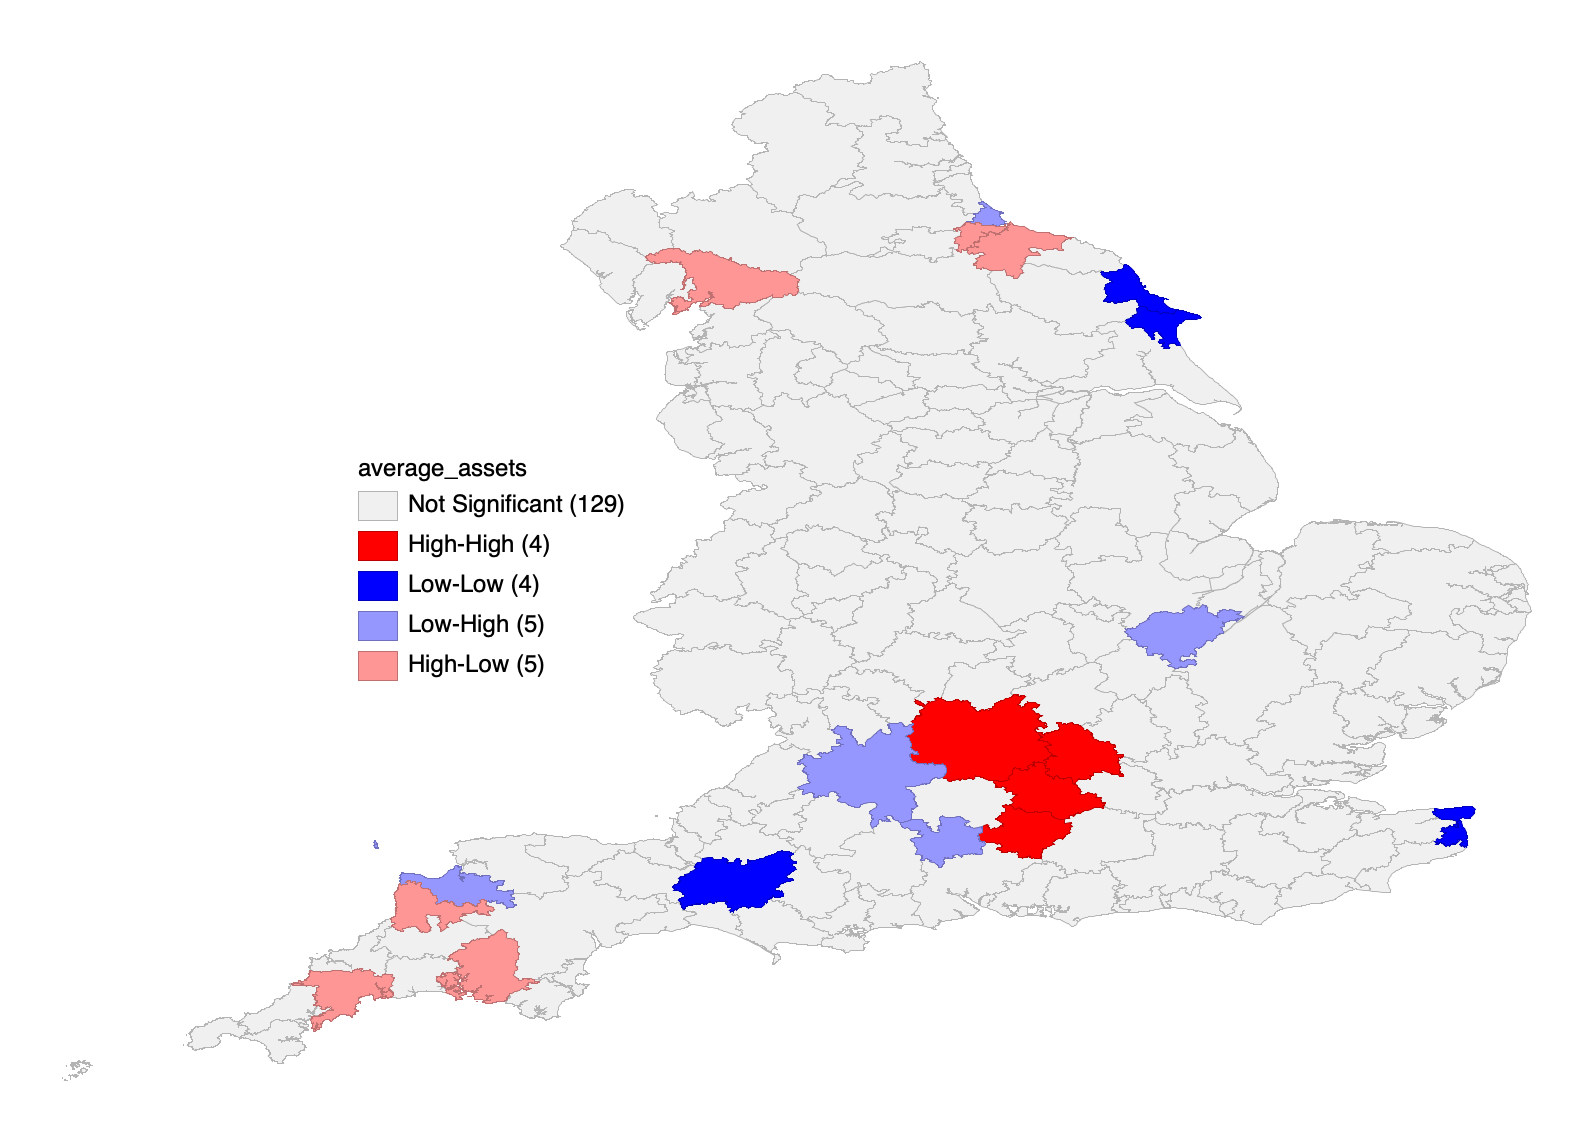

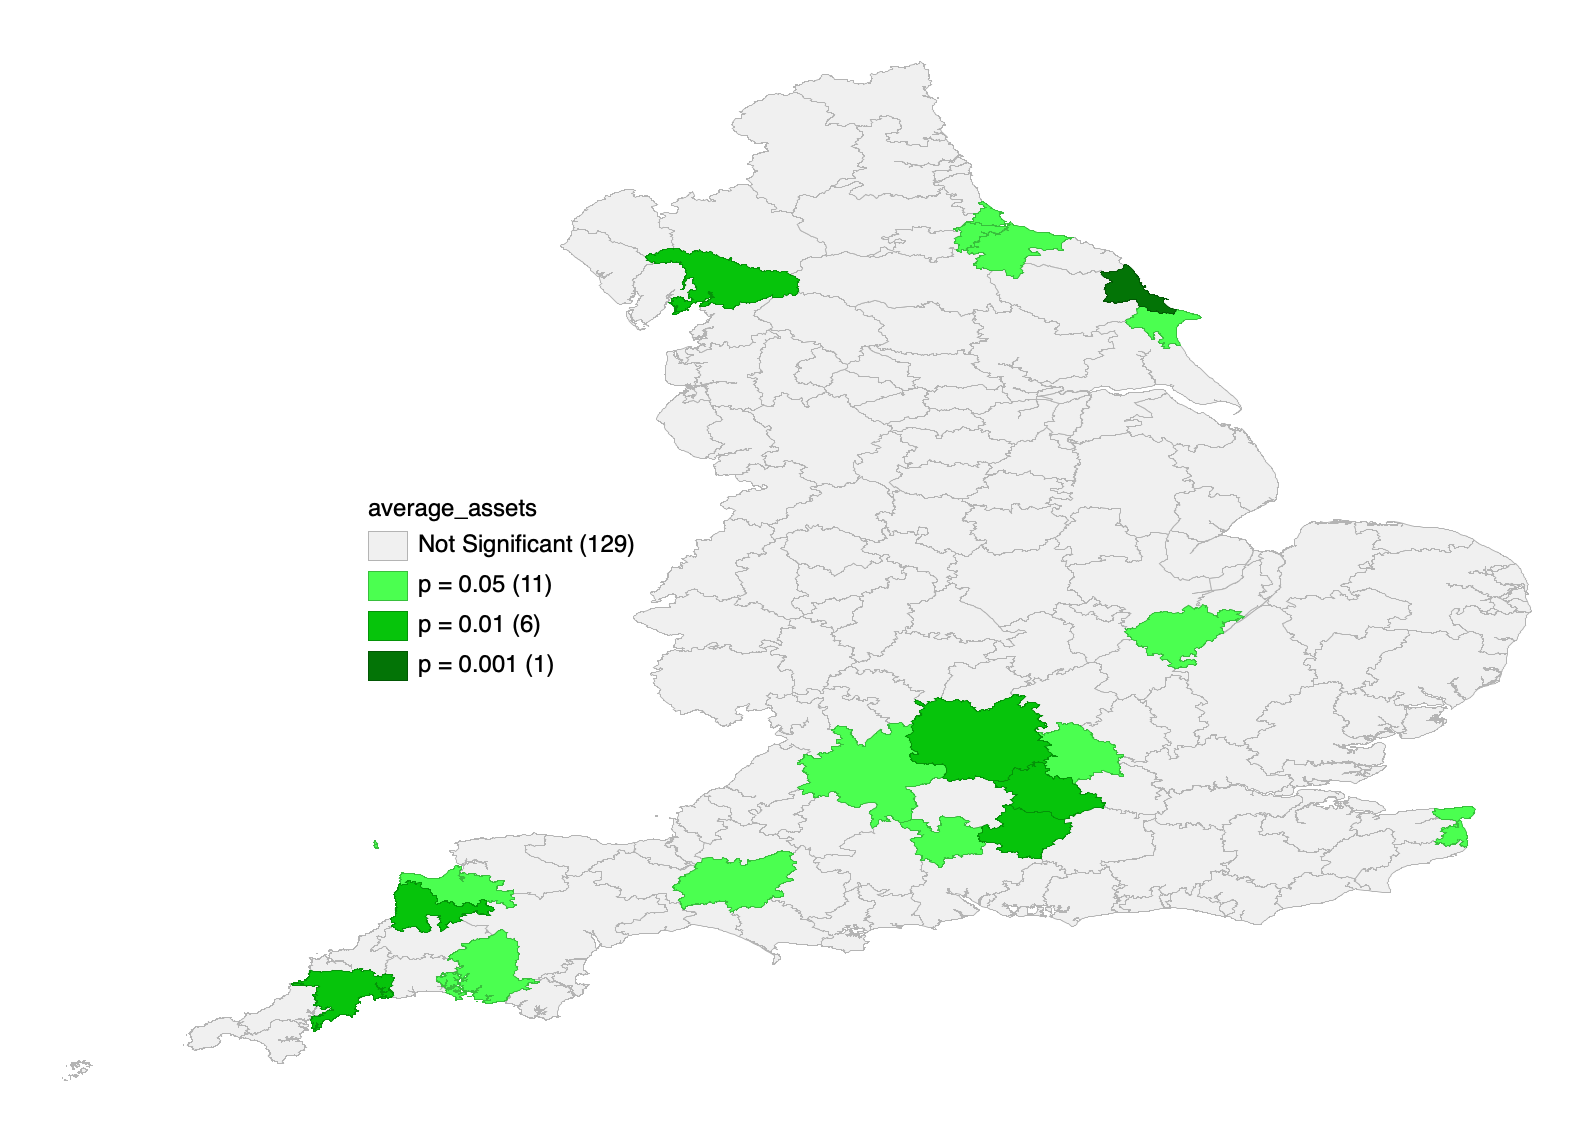

From the LISA, we can ascertain that there was statistically significant low clustering in England  

High entry rate seems to locate on the boundaries of England.

The LISA Cluser Map shows how the attribute entry rate clusters.  The red color shows tracts where high rate cluster with high rates, and blue shows where low rates cluster with low rates. There is even a mix of high-low, for example the pink color.  So, there is a cluster of high entry rate in the southwest commute area and clusters of lower ownership in the north.

## GWR

In (1)

1. classic

2. spatial lag

3. spatial error

In (2)

1. classic

2. spatial lag

3. spatial error

# Reproducible Analysis

```python
# read geojson data7

# df_mg.to_csv(PATH + "/HHI_EnR_ttwa_England_for_R.csv")

import geopandas as gpd
import fiona

import sys
PATH = sys.path[0]

# export the geojson
gdf = gpd.read_file(PATH + "/Dataset/Spatial/HHI_EnR_ttwa_England_for_R.geojson")
```

3 figures will be needed

|  | 1998         | 2008         |2018|
| --------------- |:------:| :---:|---:|
|Entry Rate       |   fig1_a   |  fig1_b  |  fig1_c  |
|HHI              |   fig2_a   |  fig2_b  |  fig2_c  |
|Performance      |   fig3_a   |  fig3_b  |  fig3_c  |

raw_data contains `ttwa`, `year`, `entry_rate`, `hh`, `assets`

In [ ]:
# environment prepare
library(tidyverse)
library(data.table)
library(sp)
library(sf)
library(table1)
library(tm)
library(spatstat)
library(here)
library(sp)
library(rgeos)
# library(maptools)
library(tmap)
library(sf)
library(geojson)
library(geojsonio)
library(tmaptools)
library(RColorBrewer)
library(spdep) 
library(lubridate)

In [4]:
# read data in R
raw_data = read.csv(here::here("Dataset","df_hh_EnR_ttwaName_asset_not_drop.csv"))

# you can have a overview of this dataset
print("The number of rows is: ")
nrow(raw_data)
print("The number of columns is: ")
ncol(raw_data)
print("70 of all varriables are:")
head(names(raw_data),n = 70)

[1] "The number of rows is: "


[1] 3089

[1] "The number of columns is: "


[1] 9

[1] "70 of all varriables are:"


[1] "X"              "ttwa"           "ttwa_code"      "year"          
[5] "firms"          "total_firms"    "entry_rate"     "hh"            
[9] "average_assets"

In [5]:
# import spatial dataset

eng_ttwa = st_read(here::here("Dataset","Spatial","eng_ttwa_boundary.geojson"))

Reading layer `eng_ttwa_boundary' from data source `/Users/fangzeqiang/Github/Master-Dissertation/Dataset/Spatial/eng_ttwa_boundary.geojson' using driver `GeoJSON'
Simple feature collection with 149 features and 5 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -6.418524 ymin: 49.86474 xmax: 1.762942 ymax: 55.54107
CRS:            4326


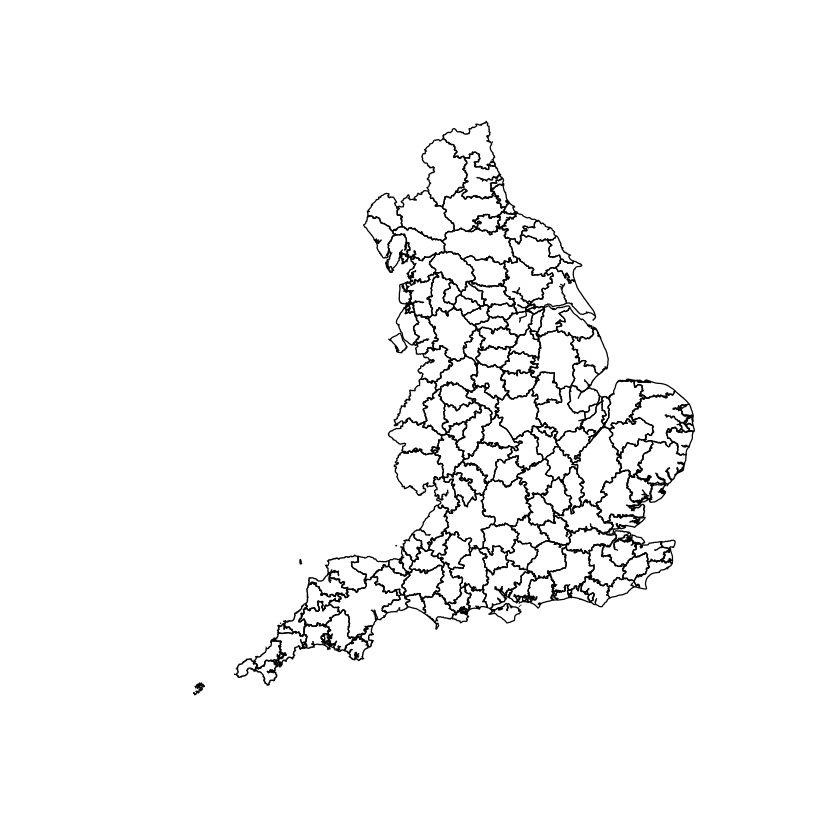

In [6]:
# plot the map
plot(st_geometry(eng_ttwa))

In [7]:
dfm = merge(raw_data,eng_ttwa,by.x="ttwa_code",by.y="TTWA11CD",all = TRUE)

In [33]:
# calculate the density of tech firms in ttwa

# df merged & density is calculated

#dfm_den_cal = dfm %>%
#    mutate(area=st_area(.))%>%
#    mutate(density = firms*1000*1000/area)

#head(dfm_den_cal)

In [8]:
tmap_mode("plot")

tmap mode set to plotting



In [46]:
# 1998
df_1998 = raw_data %>% filter(year==1998)
df_2008 = raw_data %>% filter(year==2008)
df_2018 = raw_data %>% filter(year==2018)

dfm_1998 = merge(eng_ttwa,df_1998,by.x="TTWA11CD",by.y="ttwa_code",all.x = TRUE)
dfm_2008 = merge(eng_ttwa,df_2008,by.x="TTWA11CD",by.y="ttwa_code",all.x = TRUE)
dfm_2018 = merge(eng_ttwa,df_2018,by.x="TTWA11CD",by.y="ttwa_code",all.x = TRUE)

In [91]:
dfm_1998 = dfm_1998 %>% replace_na(list(entry_rate=0,hh=0,average_assets=0))
dfm_2008 = dfm_2008 %>% replace_na(list(entry_rate=0,hh=0,average_assets=0))
dfm_2018 = dfm_2018 %>% replace_na(list(entry_rate=0,hh=0,average_assets=0))

Warning message:
“One tm layer group has duplicated layer types, which are omitted. To draw multiple layers of the same type, use multiple layer groups (i.e. specify tm_shape prior to each of them).”


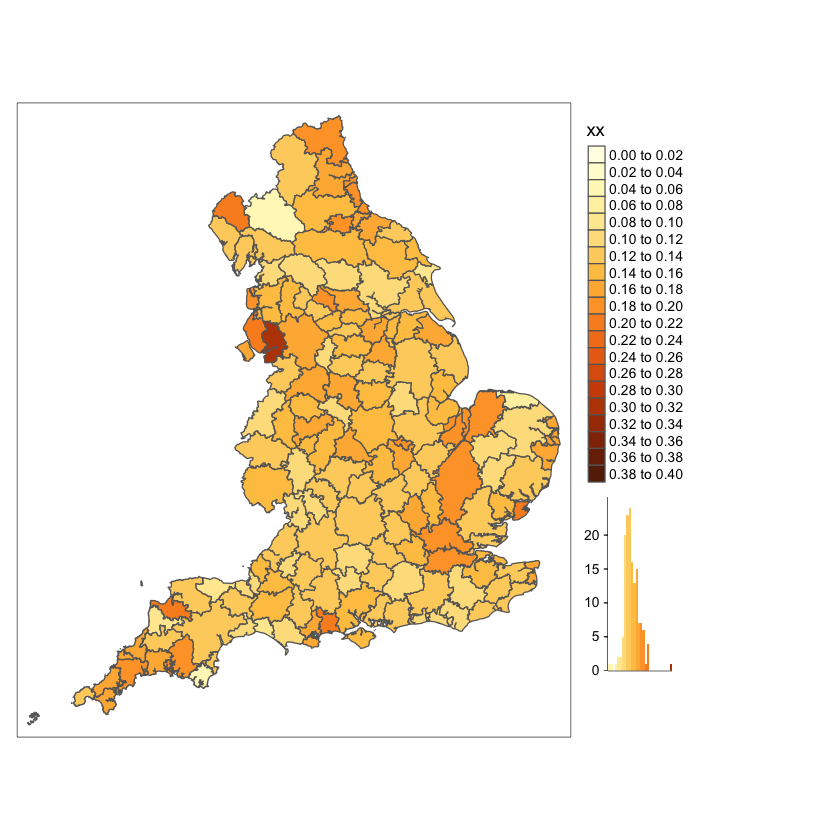

In [95]:
cus_break = c(0,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4)

df = dfm_2018

tm_shape(df) +
  tm_polygons(col = "entry_rate",
              legend.hist = TRUE,
             title = "xx",
             breaks = cus_break) +
  tm_layout(legend.outside = TRUE) +
  tm_borders()

In [267]:
# cus_break = c(0,0.01,0.02,0.03,0.08,0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4)
# cus_break = c(0,0.04,0.08,0.12,0.16,0.2,0.24,0.28,0.32,0.36,0.4)
# cus_break = c(0,0.01,0.04,0.16,0.32,0.4)
# cus_break = c(0,0.001,0.005,0.01,0.03,0.05,0.15,0.4)
# library(viridis)

In [ ]:
# adjust with the colour
# tmaptools::palette_explorer()

### Entry Rate

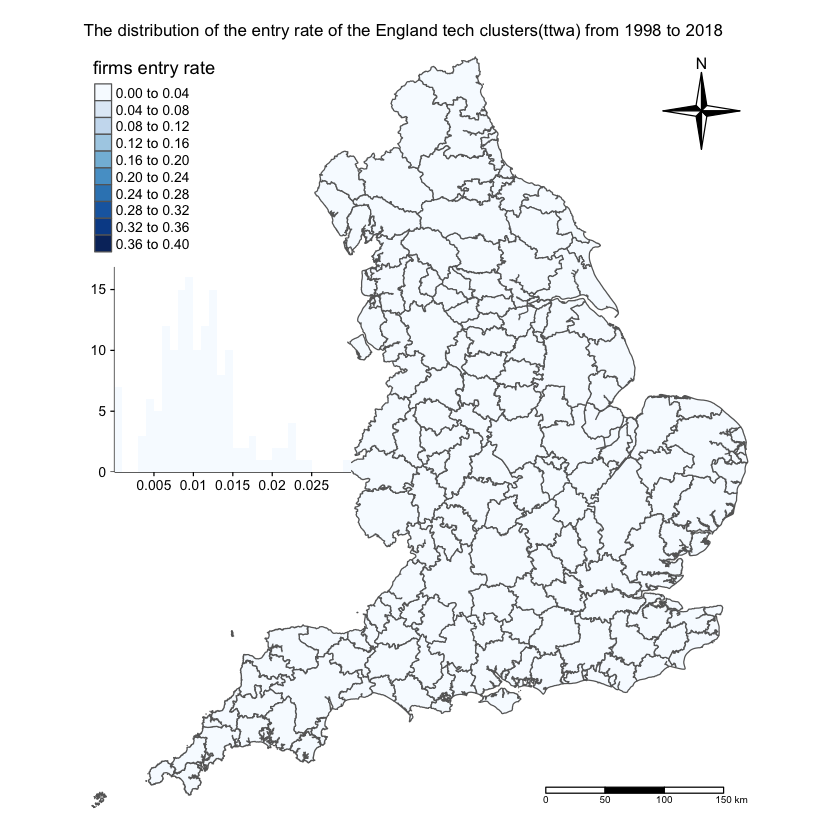

In [269]:
# plot the figure: The distribution of the density of the London charge points in 2019
df = dfm_1998
map_var = "entry_rate"
spatial_var = "ttwa"
legend_name = "firms entry rate"
title_name = "The distribution of the entry rate of the England tech clusters(ttwa) in 1998"

enR_1998_map = tm_shape( df )+ 
        tm_compass( north = 0,
              type = "4star",
#               text.size = 0.8,
#               size = 5.5,
              show.labels = TRUE,
              cardinal.directions = c("N", "E", "S", "W"),
              lwd = 1,
              position = c("right","top"),
              bg.color = NA,
              bg.alpha = NA,
              just = NA)+ 
        tm_scale_bar(position=c("right", "bottom"),
#                      text.size = 1.5
                    )+ 
#         tm_credits("Visualization by Zeqiang Fang",size=.6,position = c(.73, .0085),fontface = "bold")+ 
        tm_polygons(col = map_var,
#               style="jenks",
              palette = "Blues", n = 5,
#               pal = viridis(10, direction = -1),
#               midpoint=NA,
              breaks = cus_break, 
#               popup.vars=c(spatial_var, map_var),
              title=legend_name,
#               title.size = 1.5,
              legend.hist = TRUE
              )+ 
        tm_layout(main.title = "The distribution of the entry rate of the England tech clusters(ttwa) from 1998 to 2018",main.title.size = .85,
                 frame=FALSE)

enR_1998_map

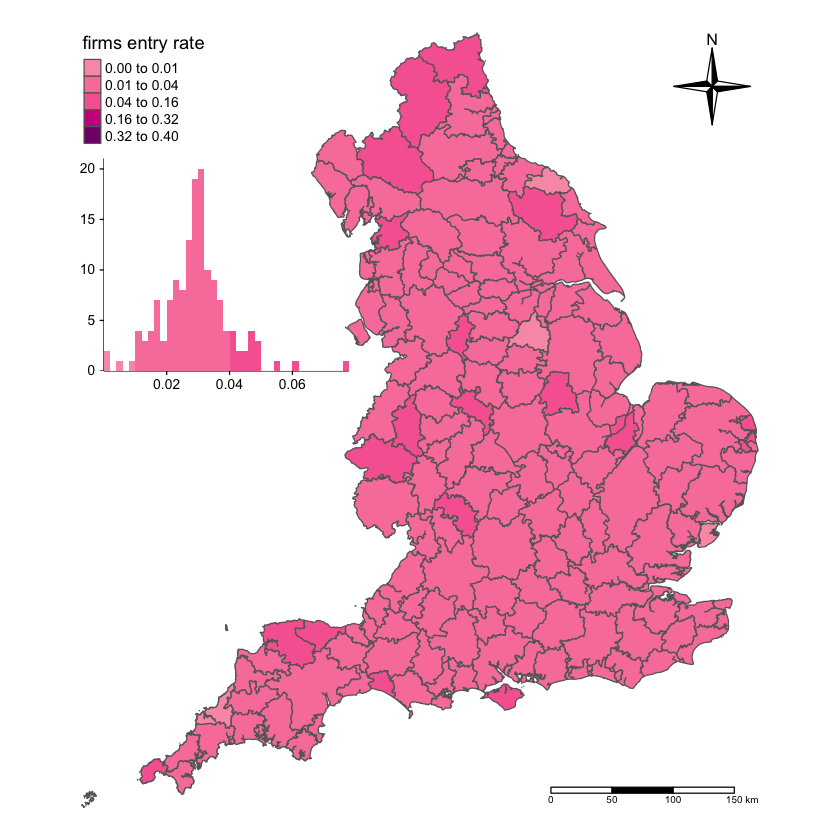

In [223]:
# plot the figure: The distribution of the density of the London charge points in 2019
df = dfm_2008
map_var = "entry_rate"
spatial_var = "ttwa"
# cus_break = c(0,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4)
legend_name = "firms entry rate"
title_name = "The distribution of the entry rate of the England tech clusters(ttwa) in 2008"

enR_2008_map = tm_shape( df )+ 
        tm_compass( north = 0,
              type = "4star",
#               text.size = 0.8,
#               size = 5.5,
              show.labels = TRUE,
              cardinal.directions = c("N", "E", "S", "W"),
              lwd = 1,
              position = c("right","top"),
              bg.color = NA,
              bg.alpha = NA,
              just = NA)+ 
        tm_scale_bar(position=c("right", "bottom"),
#                      text.size = 1.5
                    )+ 
#         tm_credits("Visualization by Zeqiang Fang",size=.6,position = c(.73, .0085),fontface = "bold")+ 
        tm_polygons(map_var,
#               style="jenks",
              palette="RdPu",
              midpoint=NA,
              breaks = cus_break, 
              #popup.vars=c(spatial_var, map_var),
              title=legend_name,
#               title.size = 1.5,
              legend.hist = TRUE
              )+
        tm_layout(frame=FALSE)
# + 
#         tm_layout(
#           title_name,
#           title.size = 1,
#           title.position = c("left","top"),
#           legend.title.size = 1,
#           legend.text.size = 1,
#           legend.position = c("left",0.3),
#           # legend.bg.color = "white",
#           # legend.digits = 5,
#           legend.bg.alpha = 1
#         ,frame=TRUE)
    # + tm_layout(legend.outside = TRUE)
enR_2008_map

# enR_2008_map = tm_shape( df )+ 
#         tm_compass( north = 0,
#               type = "4star",
#               text.size = 0.8,
#               size = 5.5,
#               show.labels = TRUE,
#               cardinal.directions = c("N", "E", "S", "W"),
#               lwd = 1,
#               position = c("right",0.75),
#               bg.color = NA,
#               bg.alpha = NA,
#               just = NA)+ 
#         tm_scale_bar(position=c("right", "bottom"),text.size = 1.5)+ 
#         tm_credits("Visualization by Zeqiang Fang",size=.6,position = c(.73, .0085),fontface = "bold")+ 
#         tm_polygons(map_var,
#               style="jenks",
#               palette="RdPu",
#               midpoint=NA,
#               breaks = cus_break, 
#               #popup.vars=c(spatial_var, map_var),
#               title=legend_name,
#               title.size = 1.5,
#               legend.hist = TRUE
#               )+ 
#         tm_layout(
#           title_name,
#           title.size = 1,
#           title.position = c("left","top"),
#           legend.title.size = 1,
#           legend.text.size = 1,
#           legend.position = c("left",0.3),
#           # legend.bg.color = "white",
#           # legend.digits = 5,
#           legend.bg.alpha = 1
#             ,frame=TRUE)
#     # + tm_layout(legend.outside = TRUE)

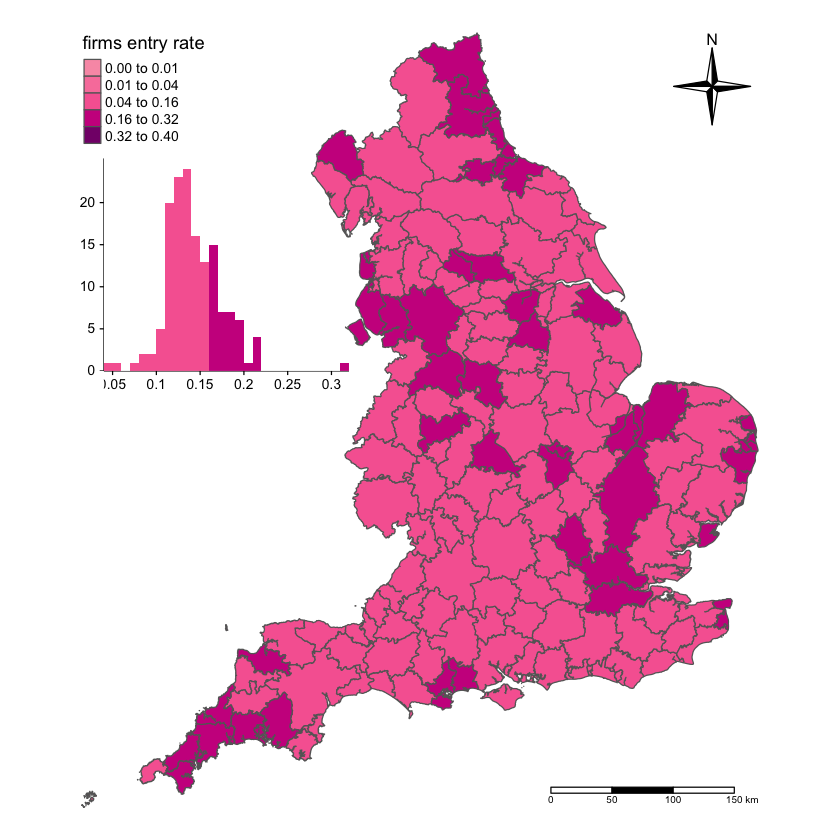

In [224]:
# plot the figure: The distribution of the density of the London charge points in 2019
df = dfm_2018
map_var = "entry_rate"
spatial_var = "ttwa"
# cus_break = c(0,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4)
legend_name = "firms entry rate"
title_name = "The distribution of the entry rate of the England tech clusters(ttwa) in 2018"

enR_2018_map = tm_shape( df )+ 
        tm_compass( north = 0,
              type = "4star",
#               text.size = 0.8,
#               size = 5.5,
              show.labels = TRUE,
              cardinal.directions = c("N", "E", "S", "W"),
              lwd = 1,
              position = c("right","top"),
              bg.color = NA,
              bg.alpha = NA,
              just = NA)+ 
        tm_scale_bar(position=c("right", "bottom"),
#                      text.size = 1.5
                    )+ 
#         tm_credits("Visualization by Zeqiang Fang",size=.6,position = c(.73, .0085),fontface = "bold")+ 
        tm_polygons(map_var,
#               style="jenks",
              palette="RdPu",
              midpoint=NA,
              breaks = cus_break, 
              #popup.vars=c(spatial_var, map_var),
              title=legend_name,
#               title.size = 1.5,
              legend.hist = TRUE,
#               legend.hist.size = 0.6
              )+
        tm_layout(frame=FALSE)
# + 
#         tm_layout(
#           title_name,
#           title.size = 1,
#           title.position = c("left","top"),
#           legend.title.size = 1,
#           legend.text.size = 1,
#           legend.position = c("left",0.3),
#           # legend.bg.color = "white",
#           # legend.digits = 5,
#           legend.bg.alpha = 1
#         ,frame=TRUE)
    # + tm_layout(legend.outside = TRUE)
enR_2018_map

# enR_2018_map = tm_shape( df )+ 
#         tm_compass( north = 0,
#               type = "4star",
#               text.size = 0.8,
#               size = 5.5,
#               show.labels = TRUE,
#               cardinal.directions = c("N", "E", "S", "W"),
#               lwd = 1,
#               position = c("right",0.75),
#               bg.color = NA,
#               bg.alpha = NA,
#               just = NA)+ 
#         tm_scale_bar(position=c("right", "bottom"),text.size = 1.5)+ 
#         tm_credits("Visualization by Zeqiang Fang",size=.6,position = c(.73, .0085),fontface = "bold")+ 
#         tm_polygons(map_var,
#               style="jenks",
#               palette="RdPu",
#               midpoint=NA,
#               breaks = cus_break, 
#               #popup.vars=c(spatial_var, map_var),
#               title=legend_name,
#               title.size = 1.5,
#               legend.hist = TRUE
#               )+ 
#         tm_layout(
#           title_name,
#           title.size = 1,
#           title.position = c("left","top"),
#           legend.title.size = 1,
#           legend.text.size = 1,
#           legend.position = c("left",0.3),
#           # legend.bg.color = "white",
#           # legend.digits = 5,
#           legend.bg.alpha = 1
#           ,frame=TRUE)
#     # + tm_layout(legend.outside = TRUE)

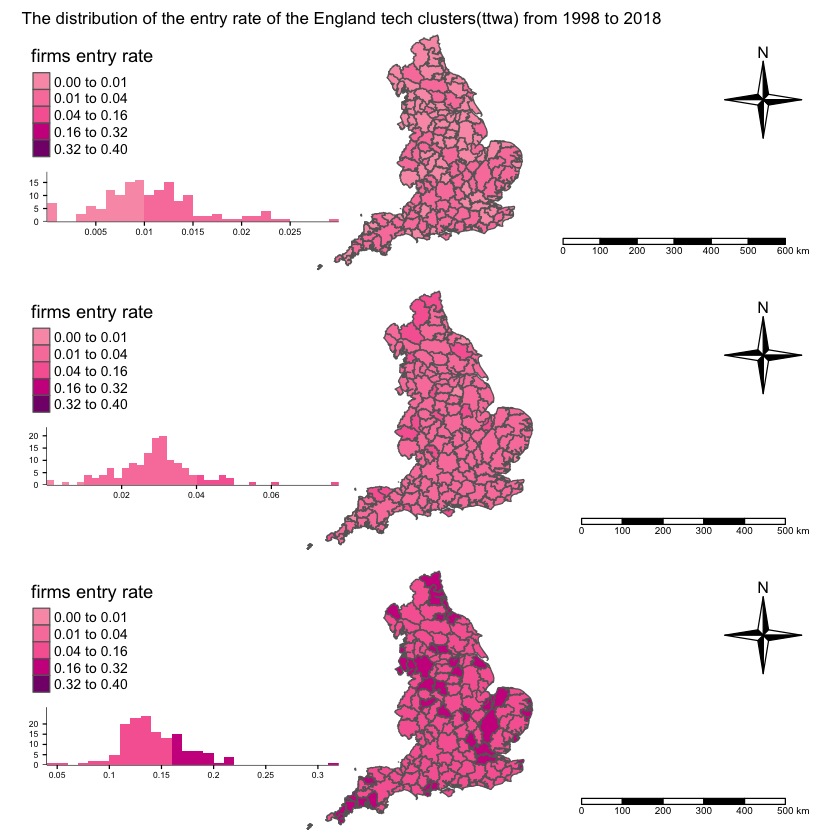

In [228]:
enR_tmap = tmap_arrange(enR_1998_map, enR_2008_map, enR_2018_map,nrow =3,ncol=1,widths = c(0.5,0.5,0.5))

enR_tmap

In [217]:
enR_tmap %>% tmap_save(.,here("Img","map_entry_rate_1998_to_2018.png"),dpi = 300)

Map saved to /Users/fangzeqiang/Github/Master-Dissertation/Img/map_entry_rate_1998_to_2018.png

Resolution: 2100 by 2100 pixels

Size: 7 by 7 inches (300 dpi)



In [ ]:
# animation 
honey_animation <- tm_shape(honey_sf) +
  tm_polygons(
    col = "Price_per_lb",
    style = "cont",
    pal = viridis(10, direction = -1)
    ) +
  tm_facets(along = "year") +
  tm_layout(legend.position = c("left", "bottom"))
tmap_animation(
  honey_animation, filename = "honey.gif",
  delay = 50, width = 2400, height = 1200
  )

In [226]:
tmaptools::palette_explorer()

Loading required namespace: shiny

Loading required namespace: shinyjs



ERROR: Error: shinyjs package needed for this function to work. Please install it.


### HHI

### Performance

# Reference

Moran's I 

https://en.wikipedia.org/wiki/Moran%27s_I

GWR

- Huang, B., Wu, B., & Barry, M. (2010). Geographically and temporally weighted regression for modeling spatio-temporal variation in house prices. International Journal of Geographical Information Science, 24(3), 383–401. doi:10.1080/13658810802672469

GWTR

- Fotheringham, A. S., Crespo, R., & Yao, J. (2015). Geographical and Temporal Weighted Regression (GTWR). Geographical Analysis, 47(4), 431–452. doi:10.1111/gean.12071 